# Plant Disease Detection

# Importing Necessary libraries

In [ ]:
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Mounting Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Dataset and Unzipping the files and saving it

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/project/plant-diseases.zip'

#  Creating Directory to extract the files
extract_path = '/content/data/'

# Creating the  extract directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extracting the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Initiation of paths and checking Data length

In [ ]:
# Path to the training and validation data folders as per the Dataset

train_path = "/content/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid_path = "/content/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
test_path = "/content/data/test/test/"

# List the files in the training and validation directories to check the size of eac dataset

train_files = os.listdir(train_path)
valid_files = os.listdir(valid_path)
test_files = os.listdir(test_path)

# Printing the length of files in each dataset

print("Number of training files:", len(train_files))
print("Number of validation files:", len(valid_files))
print("Number of test files:", len(test_files))

Number of training files: 38
Number of validation files: 38
Number of test files: 33


# Samping the Dataset if required for faster operation

In [ ]:
# import os
# import random
# import shutil

# # Defining the desired size for the reduced datasets per class

# desired_samples_per_class_train = 5  # Reducing the training dataset to 5 samples per class
# desired_samples_per_class_valid = 3  # Reducing the validation dataset to 3 samples per class

# # Defining paths to save the reduced datasets

# reduced_train_path = "/content/data/reduced_train/"

# reduced_valid_path = "/content/data/reduced_valid/"

# # Creating a Function to create new directories and copy selected files

# def create_reduced_dataset(source_path, destination_path, desired_samples_per_class):

#     # Creating destination directory

#     os.makedirs(destination_path, exist_ok=True)

#     # Listing all disease directories

#     disease_directories = os.listdir(source_path)

#     # Looping through each disease directory

#     for disease_dir in disease_directories:

#         # Retrieving the path to the current disease directory

#         disease_dir_path = os.path.join(source_path, disease_dir)

#         # Creating destination directory for the disease if it doesn't exist

#         destination_disease_dir = os.path.join(destination_path, disease_dir)
#         os.makedirs(destination_disease_dir, exist_ok=True)

#         # Listing all files in the current disease directory

#         files_in_disease = os.listdir(disease_dir_path)

#         # Sampling desired number of files from the current disease directory

#         sampled_files = random.sample(files_in_disease, desired_samples_per_class)

#         # Copying sampled files to the destination disease directory

#         for file in sampled_files:
#             source_file_path = os.path.join(disease_dir_path, file)
#             destination_file_path = os.path.join(destination_disease_dir, file)
#             shutil.copy(source_file_path, destination_file_path)

# # Creating reduced training dataset

# create_reduced_dataset(train_path, reduced_train_path, desired_samples_per_class_train)

# # Creating reduced validation dataset
# create_reduced_dataset(valid_path, reduced_valid_path, desired_samples_per_class_valid)

# # Print the number of files in each dataset after reduction

# print("Number of training files after reduction:", sum([len(files) for _, _, files in os.walk(reduced_train_path)]))
# print("Number of validation files after reduction:", sum([len(files) for _, _, files in os.walk(reduced_valid_path)]))
# print("Number of test files:", len(os.listdir(test_path)))

In [ ]:
# checking the list of diseases

train_files

['Tomato___Leaf_Mold',
 'Grape___Black_rot',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Septoria_leaf_spot',
 'Blueberry___healthy',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Potato___Early_blight',
 'Pepper,_bell___Bacterial_spot',
 'Soybean___healthy',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Common_rust_',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___healthy',
 'Potato___Late_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Squash___Powdery_mildew',
 'Raspberry___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___healthy',
 'Grape___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Strawberry___Leaf_scorch',
 'Tomato___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___Apple_scab',
 'Tomato___Target_Spot',
 'Tomato___Bacterial_spot',
 'Corn_(maize)___healthy',
 'Strawberry___healthy',
 'Potato___healthy',
 'Peach___Bacterial_spot',
 'Grape___Esca_(Black_M

In [ ]:
valid_files

['Tomato___Leaf_Mold',
 'Grape___Black_rot',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Septoria_leaf_spot',
 'Blueberry___healthy',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Potato___Early_blight',
 'Pepper,_bell___Bacterial_spot',
 'Soybean___healthy',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Common_rust_',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___healthy',
 'Potato___Late_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Squash___Powdery_mildew',
 'Raspberry___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___healthy',
 'Grape___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Strawberry___Leaf_scorch',
 'Tomato___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___Apple_scab',
 'Tomato___Target_Spot',
 'Tomato___Bacterial_spot',
 'Corn_(maize)___healthy',
 'Strawberry___healthy',
 'Potato___healthy',
 'Peach___Bacterial_spot',
 'Grape___Esca_(Black_M

In [ ]:
test_files

['TomatoEarlyBlight3.JPG',
 'CornCommonRust3.JPG',
 'TomatoHealthy3.JPG',
 'TomatoYellowCurlVirus6.JPG',
 'AppleCedarRust2.JPG',
 'AppleScab1.JPG',
 'TomatoHealthy4.JPG',
 'PotatoEarlyBlight3.JPG',
 'CornCommonRust2.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'AppleScab3.JPG',
 'AppleCedarRust3.JPG',
 'PotatoEarlyBlight4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight1.JPG',
 'PotatoEarlyBlight5.JPG',
 'AppleCedarRust1.JPG',
 'CornCommonRust1.JPG',
 'TomatoEarlyBlight6.JPG',
 'PotatoHealthy1.JPG',
 'PotatoEarlyBlight1.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'AppleCedarRust4.JPG',
 'TomatoHealthy1.JPG',
 'PotatoEarlyBlight2.JPG',
 'TomatoHealthy2.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'AppleScab2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'PotatoHealthy2.JPG']

# Image Pre-Processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining the data generator with rescaling

datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Defining the batch size

batch_size = 64

# Image Processing for Sampled Dataset

In [ ]:
# # Importing necessary libraries
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Defining the batch size

# batch_size = 64

# # Defining the data generator with rescaling

# datagen = ImageDataGenerator(rescale=1.0/255)

# # Defining the target size for images

# target_size = (224, 224)

# # Creating the data generators for training and validation with reduced datasets

# train_gen = datagen.flow_from_directory(reduced_train_path, target_size=target_size, batch_size=batch_size, class_mode='categorical')

# valid_gen = datagen.flow_from_directory(reduced_valid_path, target_size=target_size, batch_size=batch_size, class_mode='categorical')

# # Displaying class indices

# print("Class indices:", train_gen.class_indices)

# Image Preprocessing

In [ ]:
# Creating the data generators for training and validation

train_gen = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
valid_gen = datagen.flow_from_directory(valid_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
# Printing the number of samples in each set

print("Number of training samples:", train_gen.samples)
print("Number of validation samples:", valid_gen.samples)

Number of training samples: 70295
Number of validation samples: 17572


# Displaying Images from dataset

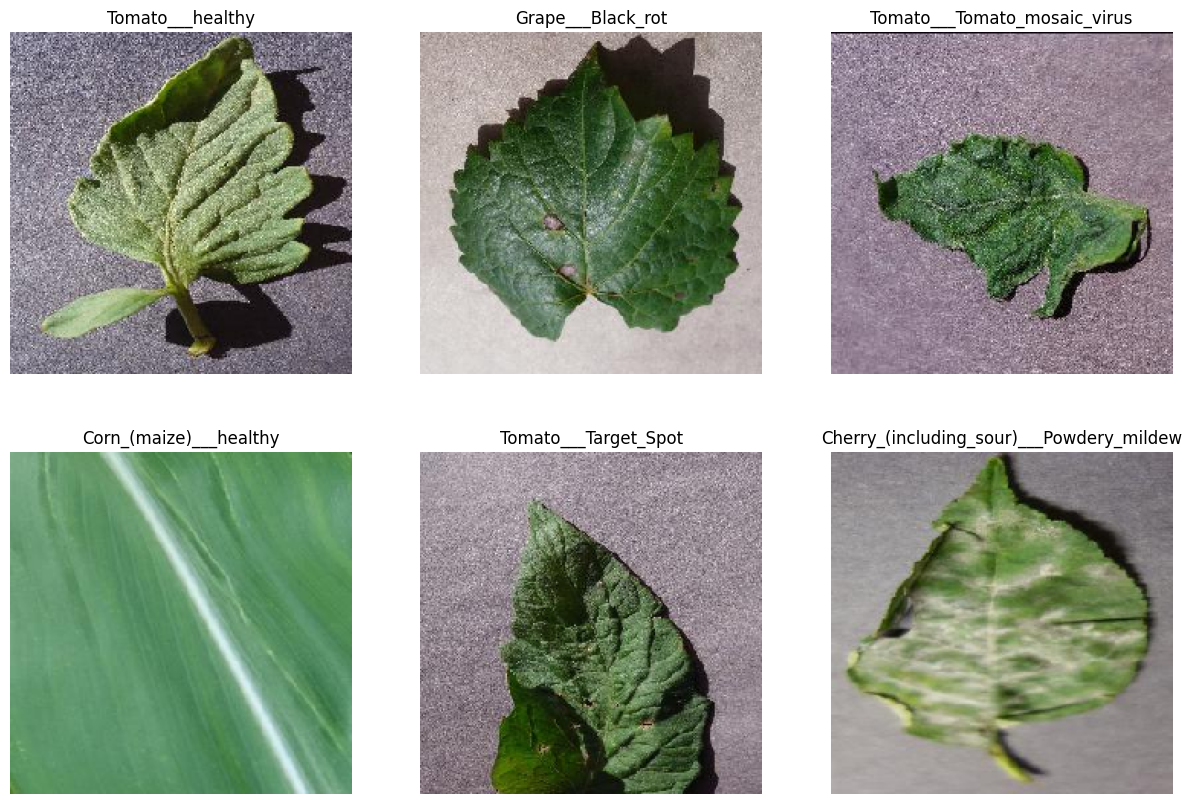

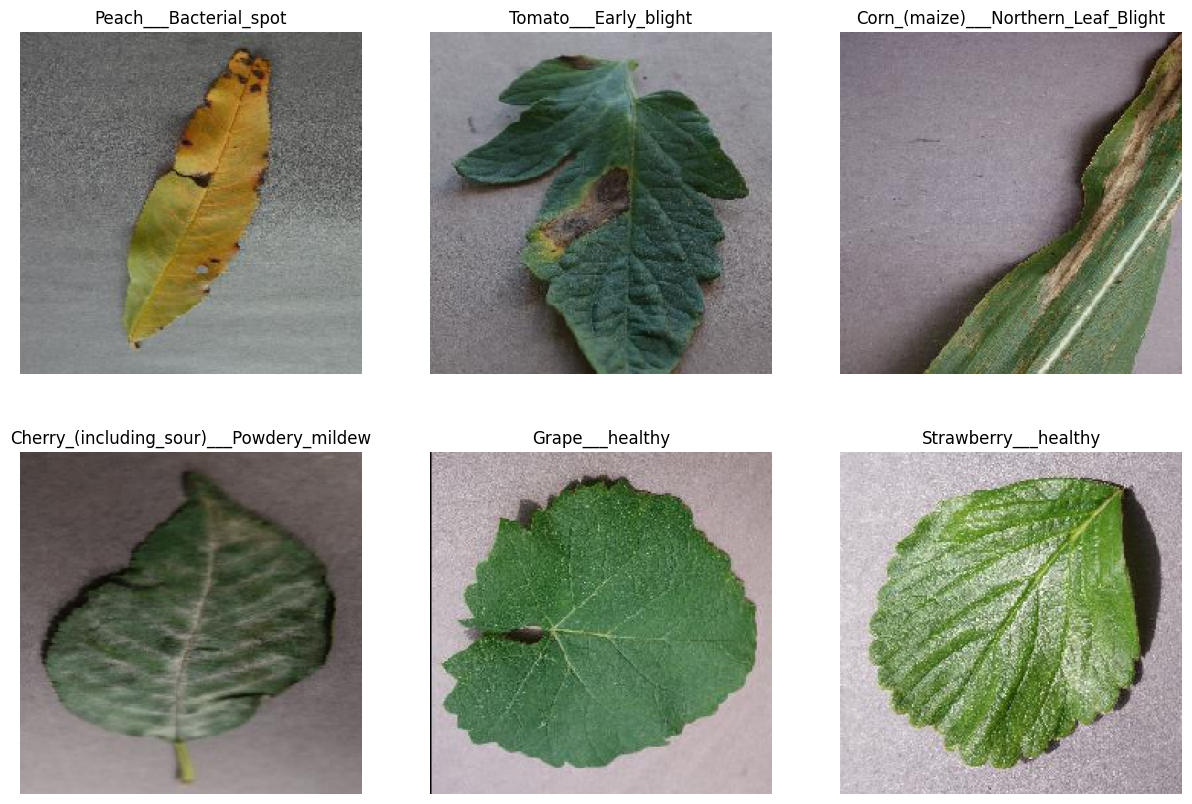

In [ ]:
import matplotlib.pyplot as plt

#  Creating a Function to plot a batch of images

def plot_images(generator, num_images=6):

    # Generating a batch of images and labels

    images, labels = next(generator)

    # Retreiving the class labels

    class_labels = list(generator.class_indices.keys())

    # Plotting the images

    plt.figure(figsize=(15, 10))

    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        plt.title(class_labels[label_index])
        plt.axis("off")
    plt.show()

# Plotting a batch of training images
plot_images(train_gen)

# Plotting a batch of validation images
plot_images(valid_gen)

# Model Creation (CNN)

In [ ]:
from tensorflow.keras import layers

CNN_Model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(train_files), activation= 'softmax')
])

# Compling the CNN Model

In [ ]:
CNN_Model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the CNN model and calculating training accuracy and validation accuracy

In [ ]:
retVal = CNN_Model.fit(train_gen,validation_data= valid_gen,epochs = 5)

Epoch 1/5
1099/1099 [==============================] - 326s 290ms/step - loss: 0.9815 - accuracy: 0.7197 - val_loss: 0.3735 - val_accuracy: 0.8831
Epoch 2/5
1099/1099 [==============================] - 232s 211ms/step - loss: 0.3099 - accuracy: 0.9008 - val_loss: 0.3139 - val_accuracy: 0.8996
Epoch 3/5
1099/1099 [==============================] - 230s 209ms/step - loss: 0.1702 - accuracy: 0.9437 - val_loss: 0.2544 - val_accuracy: 0.9210
Epoch 4/5
1099/1099 [==============================] - 221s 201ms/step - loss: 0.1110 - accuracy: 0.9628 - val_loss: 0.2405 - val_accuracy: 0.9280
Epoch 5/5
1099/1099 [==============================] - 217s 197ms/step - loss: 0.0819 - accuracy: 0.9733 - val_loss: 0.2360 - val_accuracy: 0.9352


# Plotting training history

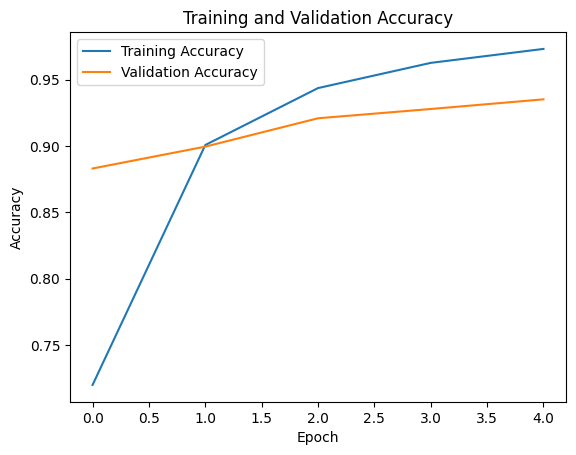

In [ ]:
plt.plot(retVal.history['accuracy'], label='Training Accuracy')
plt.plot(retVal.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# CNN model FIne Tuning

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Defining the number of classes in your dataset
num_classes = 38

# Creating a Sequential model
model = Sequential()

# Adding convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening the output of the convolutional layers
model.add(Flatten())

# Adding dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

Epoch 1/5
1099/1099 [==============================] - 264s 238ms/step - loss: 0.9795 - accuracy: 0.7120 - val_loss: 0.3820 - val_accuracy: 0.8787
Epoch 2/5
1099/1099 [==============================] - 218s 198ms/step - loss: 0.2511 - accuracy: 0.9206 - val_loss: 0.3153 - val_accuracy: 0.8969
Epoch 3/5
1099/1099 [==============================] - 223s 202ms/step - loss: 0.1250 - accuracy: 0.9590 - val_loss: 0.3193 - val_accuracy: 0.9048
Epoch 4/5
1099/1099 [==============================] - 249s 227ms/step - loss: 0.0804 - accuracy: 0.9721 - val_loss: 0.3429 - val_accuracy: 0.9027
Epoch 5/5
1099/1099 [==============================] - 206s 187ms/step - loss: 0.0649 - accuracy: 0.9785 - val_loss: 0.3520 - val_accuracy: 0.9053


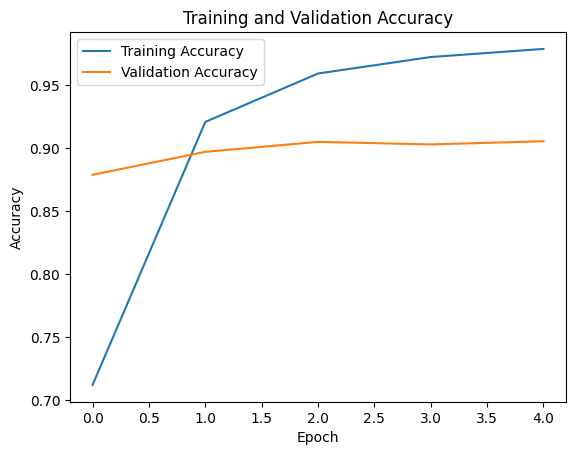

In [ ]:
# Fitting the model to the training data

history = model.fit(train_gen, epochs=5, validation_data=valid_gen)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# CNN Model 2

In [ ]:
# Defining the number of classes in your dataset
num_classes = 38

model2 = keras.Sequential()

model2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model2.add(keras.layers.MaxPooling2D(3,3))

model2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model2.add(keras.layers.MaxPooling2D(3,3))

model2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model2.add(keras.layers.MaxPooling2D(3,3))

model2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model2.add(keras.layers.Flatten())

model2.add(keras.layers.Dense(1568,activation="relu"))
model2.add(keras.layers.Dropout(0.5))

model2.add(keras.layers.Dense(38,activation="softmax"))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                 

In [ ]:
history2 = model2.fit(train_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
1099/1099 [==============================] - 354s 309ms/step - loss: 1.7404 - accuracy: 0.4866 - val_loss: 0.7021 - val_accuracy: 0.7779
Epoch 2/5
1099/1099 [==============================] - 280s 254ms/step - loss: 0.5935 - accuracy: 0.8107 - val_loss: 0.3660 - val_accuracy: 0.8830
Epoch 3/5
1099/1099 [==============================] - 318s 289ms/step - loss: 0.3443 - accuracy: 0.8882 - val_loss: 0.3616 - val_accuracy: 0.8841
Epoch 4/5
1099/1099 [==============================] - 278s 253ms/step - loss: 0.2433 - accuracy: 0.9213 - val_loss: 0.2167 - val_accuracy: 0.9269
Epoch 5/5
1099/1099 [==============================] - 276s 251ms/step - loss: 0.1781 - accuracy: 0.9410 - val_loss: 0.1746 - val_accuracy: 0.9411


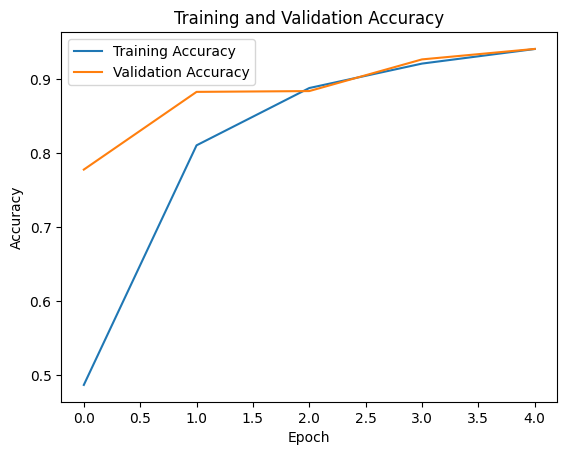

In [ ]:
# Fitting the model to the training data

# Plot training history
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Evaluation on Testing Data

In [ ]:
from tensorflow.keras.preprocessing import image

# Creating Function to load and preprocess images

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

#  Creating a Function to get class labels from generator
def get_class_labels(generator):
    class_labels = list(generator.class_indices.keys())
    return class_labels

# Evaluating for all testing data

In [ ]:
predicted_classes = []

for img_name in test_files:
    img_path = os.path.join(test_path, img_name)
    img_array = load_and_preprocess_image(img_path)
    predictions = CNN_Model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_classes.append(predicted_class_idx)

1/1 [==============================] - 0s 17ms/step


In [ ]:
# Retreving class labels
class_labels = get_class_labels(train_gen)  # Assuming train_gen is used to train the model

In [ ]:
# Mapping predicted class indices to class labels
predicted_class_labels = [class_labels[idx] for idx in predicted_classes]

In [ ]:
# Printing the predictions
for img_name, predicted_label in zip(test_files, predicted_class_labels):
    print(f"Image: {img_name}, Predicted Class: {predicted_label}")

Image: TomatoEarlyBlight3.JPG, Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: CornCommonRust3.JPG, Predicted Class: Corn_(maize)___Common_rust_
Image: TomatoHealthy3.JPG, Predicted Class: Tomato___healthy
Image: TomatoYellowCurlVirus6.JPG, Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: AppleCedarRust2.JPG, Predicted Class: Apple___Cedar_apple_rust
Image: AppleScab1.JPG, Predicted Class: Apple___Apple_scab
Image: TomatoHealthy4.JPG, Predicted Class: Tomato___Target_Spot
Image: PotatoEarlyBlight3.JPG, Predicted Class: Soybean___healthy
Image: CornCommonRust2.JPG, Predicted Class: Corn_(maize)___Common_rust_
Image: TomatoYellowCurlVirus2.JPG, Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: AppleScab3.JPG, Predicted Class: Potato___Early_blight
Image: AppleCedarRust3.JPG, Predicted Class: Apple___Cedar_apple_rust
Image: PotatoEarlyBlight4.JPG, Predicted Class: Potato___Early_blight
Image: TomatoYellowCurlVirus1.JPG, Predicted Class: Tomato___T

# Using GPT

In [ ]:
from tensorflow.keras.preprocessing import image
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

# Loading pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# Loading the trained CNN model

cnn_model = CNN_Model

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
# Creating a Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array


In [ ]:
# Creating a Function to extract features using the CNN model
def extract_features(image_path):
    img_array = load_and_preprocess_image(image_path)
    features = cnn_model.predict(img_array)  # Extract features using CNN model
    return features

In [ ]:
# Creating a Function to convert features into text data

def features_to_text(features):

    # Converting features to text

    text_data = " ".join(str(f) for f in features.flatten())

    return text_data

In [ ]:
# Creating a Function to predict disease using GPT model

def predict_disease(text_data):
    # Tokenizing text data and generate predictions using GPT model
    input_ids = tokenizer.encode(text_data, return_tensors="tf", max_length=512, truncation=True)
    outputs = gpt_model(input_ids)
    predicted_logits = outputs.logits
    predicted_class_idx = tf.argmax(predicted_logits[0], axis=-1).numpy()

    # Handling multiple indices with the maximum value
    if isinstance(predicted_class_idx, np.ndarray):
        predicted_class_idx = predicted_class_idx[0]  # Select the first index

    predicted_disease_label = class_labels[predicted_class_idx]  # Assuming class_labels is a list of disease labels
    return predicted_disease_label

In [ ]:
# Testing the integration for a sample image

image_path = test_path + "CornCommonRust3.JPG"
extracted_features = extract_features(image_path)
text_data = features_to_text(extracted_features)
predicted_disease = predict_disease(text_data)
print("Predicted disease:", predicted_disease)

1/1 [==============================] - 0s 18ms/step
Predicted disease: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


# Using OPEN API GPT 3.5

In [ ]:
# pip install openai

In [ ]:
# pip install openai==0.28

In [ ]:
import openai
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Initializing OpenAI client with API key

openai_api_key = 'sk-proj-n3P8SDiB265sibxsaG9xT3BlbkFJMxv058uPEcJORE9m3Epv'
openai.api_key = openai_api_key

# Loading the trained CNN model

cnn_model = CNN_Model

In [ ]:
# Creating a  Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expanding dimensions to match batch size
    img_array = img_array / 255.0  # Normalizing pixel values
    return img_array

In [ ]:
# Creating a Function to extract features using the CNN model

def extract_features(image_path):
    img_array = load_and_preprocess_image(image_path)
    features = cnn_model.predict(img_array)  # Extracting features using CNN model
    return features

In [ ]:
# Creating a Funnction to predict the disease given the image

def predict_disease_gpt(image_path):
    # Extracting features from image
    features = extract_features(image_path)

    # Converting features to text data
    text_data = " ".join(str(f) for f in features.flatten())

    response = openai.Completion.create(
        engine="gpt-3.5-turbo-0125",
        prompt=text_data,
        max_tokens=50,
        n=1,
        temperature=0.5,
        stop=None
    )
    predicted_disease = response['choices'][0]['text'].strip()
    return predicted_disease

In [ ]:
# Testing the integration for a sample image
image_path = test_path + "CornCommonRust3.JPG"
predicted_disease = predict_disease_gpt(image_path)
print("Predicted disease:", predicted_disease)

1/1 [==============================] - 0s 71ms/step


RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.